## Observations and Insights

* Comment1
* Comment2
* Comment3

## Dependencies and starter code

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from IPython.display import Markdown as md

# Study data files
mouse = "data/Mouse_metadata.csv"
results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse)
results_df = pd.read_csv(results)

In [92]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_df, results_df, on="Mouse ID", how="left")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics
* Summary statistics of Tumor Volume (mm3) by Drug Regimen

In [93]:
summary = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg(['mean',
                                                                                      'median',
                                                                                      'var',
                                                                                      'std',
                                                                                      'sem']))
summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [94]:
count = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Mouse ID"].count())
count = count[["Mouse ID"]]
count.rename(columns={"Mouse ID":"Data Points"}, inplace=True)

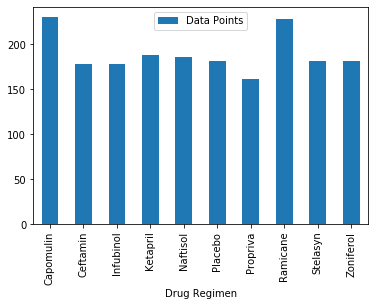

In [95]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count.plot.bar()

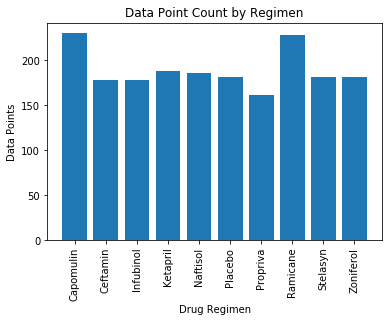

In [96]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# count.plot(kind="bar")
count = count.reset_index(drop=False)
plt.bar(count["Drug Regimen"],count["Data Points"])
plt.xticks(rotation=90)
plt.title("Data Point Count by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()

## Pie Plots

In [97]:
gender = merged_df.drop_duplicates("Mouse ID")
gender = pd.DataFrame(gender.groupby(['Sex'])["Mouse ID"].count())
gender = gender[["Mouse ID"]]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C9CC41C48>],
      dtype=object)

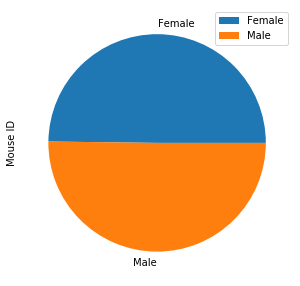

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender.plot.pie(subplots=True, figsize=(5,5))

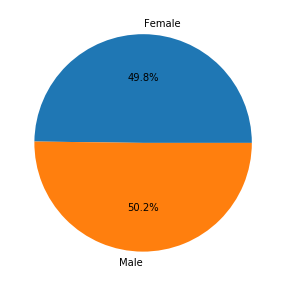

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
share = gender["Mouse ID"]
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(gender["Mouse ID"], labels = gender.index.values.tolist(),autopct='%1.1f%%')
plt.show()

## Quartiles, outliers and boxplots

In [100]:
merged_df_sorted = merged_df.sort_values("Timepoint", ascending=False)
merged_df_grouped_regimen = merged_df_sorted.groupby(["Drug Regimen","Mouse ID"])
quartile_df = merged_df_grouped_regimen.first()
quartile_df = quartile_df.reset_index()
#quartile_df

#### CAPOMULIN

In [101]:
capomulin = quartile_df.loc[quartile_df["Drug Regimen"] == "Capomulin"]

Q1_cap = np.percentile(capomulin['Tumor Volume (mm3)'], 25)
Q3_cap = np.percentile(capomulin['Tumor Volume (mm3)'], 75)
IQR_cap = Q3_cap - Q1_cap
upper_boundary_cap = Q3_cap + (1.5 * IQR_cap)
lower_boundary_cap = Q1_cap - (1.5 * IQR_cap)

low_outliers_cap = capomulin[capomulin['Tumor Volume (mm3)'] <= lower_boundary_cap]
low_outliers_cap = low_outliers_cap['Tumor Volume (mm3)'].count()

high_outliers_cap = capomulin[capomulin['Tumor Volume (mm3)'] >= upper_boundary_cap]
high_outliers_cap = high_outliers_cap['Tumor Volume (mm3)'].count()

#### RAMICANE

In [102]:
ramicane = quartile_df.loc[quartile_df["Drug Regimen"] == "Ramicane"]

Q1_ram = np.percentile(ramicane['Tumor Volume (mm3)'], 25)
Q3_ram = np.percentile(ramicane['Tumor Volume (mm3)'], 75)
IQR_ram = Q3_ram - Q1_ram
upper_boundary_ram = Q3_ram + (1.5 * IQR_ram)
lower_boundary_ram = Q1_ram - (1.5 * IQR_ram)

low_outliers_ram = ramicane[ramicane['Tumor Volume (mm3)'] <= lower_boundary_ram]
low_outliers_ram = low_outliers_ram['Tumor Volume (mm3)'].count()

high_outliers_ram = ramicane[ramicane['Tumor Volume (mm3)'] >= upper_boundary_ram]
high_outliers_ram = high_outliers_ram['Tumor Volume (mm3)'].count()

#### INFUBINOL

In [103]:
infubinol = quartile_df.loc[quartile_df["Drug Regimen"] == "Infubinol"]

Q1_inf = np.percentile(infubinol['Tumor Volume (mm3)'], 25)
Q3_inf = np.percentile(infubinol['Tumor Volume (mm3)'], 75)
IQR_inf = Q3_inf - Q1_inf
upper_boundary_inf = Q3_inf + (1.5 * IQR_inf)
lower_boundary_inf = Q1_inf - (1.5 * IQR_inf)

low_outliers_inf = infubinol[infubinol['Tumor Volume (mm3)'] <= lower_boundary_inf]
low_outliers_inf = low_outliers_inf['Tumor Volume (mm3)'].count()

high_outliers_inf = infubinol[infubinol['Tumor Volume (mm3)'] >= upper_boundary_inf]
high_outliers_inf = high_outliers_inf['Tumor Volume (mm3)'].count()

#### CEFTAMIN

In [104]:
ceftamin = quartile_df.loc[quartile_df["Drug Regimen"] == "Ceftamin"]

Q1_cef = np.percentile(ceftamin['Tumor Volume (mm3)'], 25)
Q3_cef = np.percentile(ceftamin['Tumor Volume (mm3)'], 75)
IQR_cef = Q3_cef - Q1_cef
upper_boundary_cef = Q3_cef + (1.5 * IQR_cef)
lower_boundary_cef = Q1_cef - (1.5 * IQR_cef)

low_outliers_cef = ceftamin[ceftamin['Tumor Volume (mm3)'] <= lower_boundary_cef]
low_outliers_cef = low_outliers_cef['Tumor Volume (mm3)'].count()

high_outliers_cef = ceftamin[ceftamin['Tumor Volume (mm3)'] >= upper_boundary_cef]
high_outliers_cef = high_outliers_cef['Tumor Volume (mm3)'].count()

In [105]:
print("==========================================")
print('\033[1m' + 'CAPOMULIN' + '\033[0m')
print("Low outlier(s) count: %s"%(low_outliers_cap))
print("High outlier(s) count: %s"%(high_outliers_cap))
print("==========================================")
print('\033[1m' + 'RAMICANE' + '\033[0m')
print("Low outlier(s) count: %s"%(low_outliers_ram))
print("High outlier(s) count: %s"%(high_outliers_ram))
print("==========================================")
print('\033[1m' + 'INFUBINOL' + '\033[0m')
print("Low outlier(s) count: %s"%(low_outliers_inf))
print("High outlier(s) count: %s"%(high_outliers_inf))
print("==========================================")
print('\033[1m' + 'CEFTAMIN' + '\033[0m')
print("Low outlier(s) count: %s"%(low_outliers_cef))
print("High outlier(s) count: %s"%(high_outliers_cef))
print("==========================================")

CAPOMULIN
Low outlier(s) count: 0
High outlier(s) count: 0
RAMICANE
Low outlier(s) count: 0
High outlier(s) count: 0
INFUBINOL
Low outlier(s) count: 1
High outlier(s) count: 0
CEFTAMIN
Low outlier(s) count: 0
High outlier(s) count: 0


[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ceftamin')]

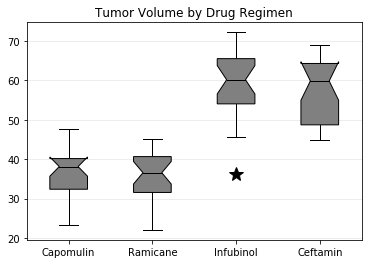

In [106]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = merged_df.sort_values("Timepoint", ascending=False)
boxplot = boxplot.groupby(["Drug Regimen","Mouse ID"])
boxplot = boxplot.first()

data = {"Capomulin":boxplot.loc["Capomulin","Tumor Volume (mm3)"],
        "Ramicane":boxplot.loc["Ramicane","Tumor Volume (mm3)"],
        "Infubinol":boxplot.loc["Infubinol","Tumor Volume (mm3)"],
        "Ceftamin":boxplot.loc["Ceftamin","Tumor Volume (mm3)"],}

fig, ax = plt.subplots()
ax.boxplot(data.values(), showfliers = True, patch_artist = True, notch = True,
          boxprops = dict(facecolor = "grey", color = "black"),
          capprops = dict(color = "black"),
          whiskerprops = dict(color = "black"),
          flierprops = dict(marker = "*", markeredgecolor = "black", markerfacecolor = "black", markersize=15),
          medianprops = dict(color = "black")
          )
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
#fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
ax.set_title('Tumor Volume by Drug Regimen')
ax.set_xticklabels(data.keys())

## Line and scatter plots

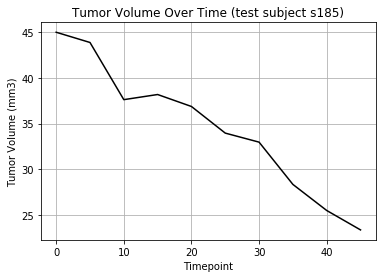

In [107]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_line =merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin") & 
                              (merged_df["Mouse ID"] == "s185"),
                              ["Timepoint","Tumor Volume (mm3)"]
                             ]

x_axis = capomulin_line['Timepoint']
y_axis = capomulin_line['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis, color="Black")
plt.grid(True)
plt.title("Tumor Volume Over Time (test subject s185)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
#capomulin_line

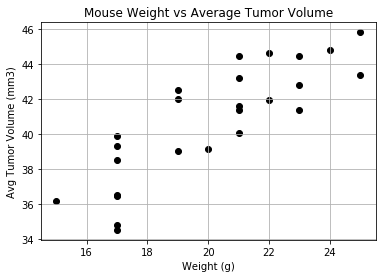

In [108]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scatter = merged_df.loc[merged_df["Drug Regimen"]=="Capomulin",["Mouse ID", "Weight (g)","Tumor Volume (mm3)"]]
capomulin_scatter = capomulin_scatter.groupby("Mouse ID").mean()
capomulin_scatter.head()

plt.scatter(capomulin_scatter["Weight (g)"], capomulin_scatter["Tumor Volume (mm3)"], 
            marker="o", 
            facecolors="black", 
            edgecolors="black"
           )
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.grid(True)
plt.show()

The correlation coefficient is: 0.8419363424694718


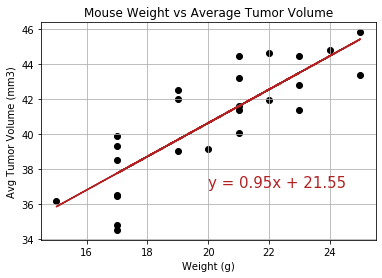

In [109]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_scatter["Weight (g)"], capomulin_scatter["Tumor Volume (mm3)"])
regress_values = capomulin_scatter["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_scatter["Weight (g)"], capomulin_scatter["Tumor Volume (mm3)"], 
            marker="o", 
            facecolors="black", 
            edgecolors="black"
           )
plt.plot(capomulin_scatter["Weight (g)"],
         regress_values,
         "r-",
         color = "firebrick"
        )
plt.annotate(line_eq,(20,37),
             fontsize=15,
             color="firebrick"
            )
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
print(f"The correlation coefficient is: {rvalue}")
plt.grid(True)
plt.show()

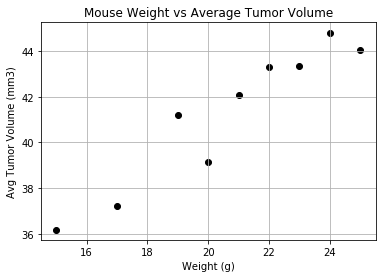

In [110]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scatter2 = merged_df.loc[merged_df["Drug Regimen"]=="Capomulin",["Weight (g)","Tumor Volume (mm3)"]]
capomulin_scatter2 = capomulin_scatter2.groupby("Weight (g)").mean()

plt.scatter(capomulin_scatter2.index.values, capomulin_scatter2["Tumor Volume (mm3)"], 
            marker="o", 
            facecolors="black", 
            edgecolors="black"
           )
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.grid(True)
plt.show()

The correlation coefficient is: 0.950524396185527


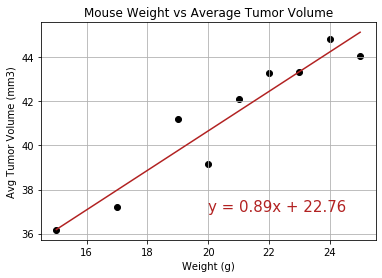

In [111]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_scatter2.index.values, capomulin_scatter2["Tumor Volume (mm3)"])
regress_values = capomulin_scatter2.index.values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_scatter2.index.values, capomulin_scatter2["Tumor Volume (mm3)"], 
            marker="o", 
            facecolors="black", 
            edgecolors="black"
           )
plt.plot(capomulin_scatter2.index.values,
         regress_values,
         "r-",
         color = "firebrick"
        )
plt.annotate(line_eq,(20,37),
             fontsize=15,
             color="firebrick"
            )
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
print(f"The correlation coefficient is: {rvalue}")
plt.grid(True)
plt.show()